In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
class LinearRegressor: #multivariate
    def __init__(self,learn_rate=0.5,n_iter=1500):
        self.w = 0
        self.b = 0
        self.learn_rate = learn_rate
        self.n_iter = n_iter
        self.cost_history = []
    
    def cost(self,x,y,y_pred):
        return 1/2*len(x)*(np.sum((y_pred-y)**2))

    def fit(self,x,y):
        n = len(x)
        features = x.shape[1]
        # weight matrix with the same no.of columns as the features
        self.w = np.zeros(x.shape[1])

        for i in range(self.n_iter):
            y_pred = np.dot(x,self.w) + self.b
            self.cost_history.append(self.cost(x,y,y_pred))
            error = y_pred-y

            djdw = (1/n)*(np.dot(x.T,error))
            djdb = (1/n)*(np.sum(error))

            self.w -= self.learn_rate*djdw
            self.b -= self.learn_rate*djdb      
    
    def predict(self,x):
        return np.dot(x,self.w) + self.b
    
    def mse(self,y,y_pred):
        return np.mean((y-y_pred)**2)     

In [69]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
dataset.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [70]:
x = pd.DataFrame(dataset.data,columns=dataset.feature_names)
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [71]:
y = dataset.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.33,random_state=42)

In [73]:
model = LinearRegressor()
model.fit(x_train,y_train)

In [74]:
pred = model.predict(x_valid)
pred[0:5]

array([142.3387688 , 176.23836311, 139.98306048, 280.4931968 ,
       127.86263791])

In [75]:
y_valid[0:5]

array([219.,  70., 202., 230., 111.])

In [76]:
model.mse(y_valid,pred)

2776.727558621222

In [77]:
from sklearn.metrics import r2_score
r2 = r2_score(y_valid,pred)
r2

0.5175322040167065

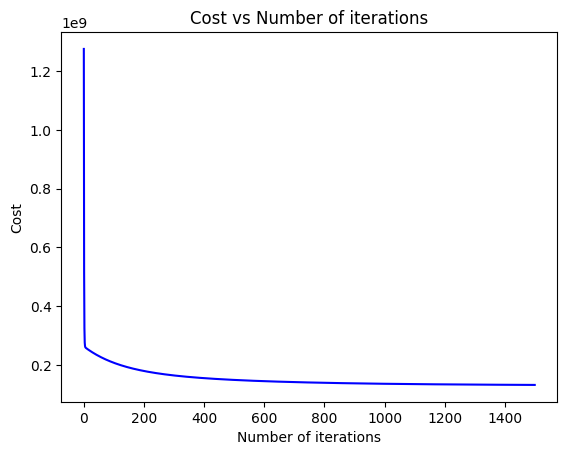

In [78]:
import matplotlib.pyplot as plt
nb = np.arange(1500)
j = model.cost_history
plt.plot(nb,j,color='b')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations")
plt.show()